
#**Project Title:**


#                  **Cyber Security Intrusion Detection Systems : Comparative analysis on ML classification and Neural Networks**





#Author

**Author Name:** Benita Ashley

**Student ID:** 220058151

# Project Supervisor

**Name:** Dr Mahdieh Sadabadi

#**1. Real World Problem**

**1.1 : Network Intrusion**

Any unauthorised action on a computer network is referred to as a network intrusion. Unauthorized or unusual network activity puts users' privacy at danger and may harm the infrastructure and overall operation of the network.


**Intrusion detector :**
An intrusion detection system can identify network incursions and guard against unauthorised users, including potential insiders, on a computer network.

**1.2 : Problem Statement**

Building a predictive model (i.e., a classifier) that can differentiate between faulty connections, referred to as intrusions or attacks, and good normal connections is the goal of the intrusion detector learning task.

**1.3 : Dataset Information**

In this dataset Attacks fall into four main categories:

1. DOS: denial-of-service, e.g. syn flood.
2. R2L: unauthorized access from a remote machine, e.g. guessing password.
3. U2R: unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks.
4. probing: surveillance and other probing, e.g., port scanning.

Source of the dataset : https://www.unb.ca/cic/datasets/nsl.html

**1.4 : Business Objectives**

*   No requirement for low latency.
*   It's crucial to have some interpretability.

*   The network intrusion should be as accurately detected as feasible.
*   Intrusion detection should be completed in a matter of seconds or minutes, not hours.










#**2. Machine Learning Problem Formulation**

**2.1 : Dataset Overview**



*  Train data : It has 125973 datapoints with 42 features
*  Test data : it has 22544 datapoints with 42 features

Source of the data : https://www.unb.ca/cic/datasets/nsl.html

**2.2 Mapping the real world problem to a ML problem**



*   We must categorise two types of classes: attack and normal. This challenge involves binary categorization.
*  We use AUC, f1 score, confusion matrix, precision and recall to evaluate the performance of the system.



#**3. Exploratory Data Analysis**

#**3.1 Reading the Data**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.utils import resample
#!pip install  mlxtend.classifier
#from mlxtend.classifier import StackingClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# to display all column of datapoints
pd.set_option('display.max_columns', None)

**3.1.1 Reading Train Data**

In [ ]:
# reading the train data
# giving feature name expliticly as in the train data these are missing
fetaures_name =  ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


# please specify the sep = ',' parameter ,else all the datapoints will placed in the first column itself
train_data =  pd.read_table("KDDTrain+.txt",sep = ',', names=fetaures_name)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# there is an extra feature present at 43 number column which is not useful remove it.
# for this lets use iloc : integer location , where we will do indexing for selection by position
train_data = train_data.iloc[:,:-1]
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
print("Shape of the training data",train_data.shape)
print("number of data points ",train_data.shape[0])
print("Number of feature ",train_data.shape[1])

Shape of the training data (125973, 42)
number of data points  125973
Number of feature  42


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

**3.1.2 Giving class labels to the attacks**

We give the following labels for better interpretation of the dataset:

1. Normal : 0
2. All other attacks: 1

In [ ]:
# creating a function to give label
def labeling(x):
    if x == 'normal':
        return 0
    else:
        return 1
    
#stroing all the attack in the variable label    
label = train_data['attack'] 

# mapping all the attack to the desired output which is 0 and 1 
class_label = label.map(labeling)

#creating a new column called label in the training data
train_data['label'] = class_label

In [ ]:
print("shape of the train data",train_data.shape)
train_data.head(3)

shape of the train data (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,1


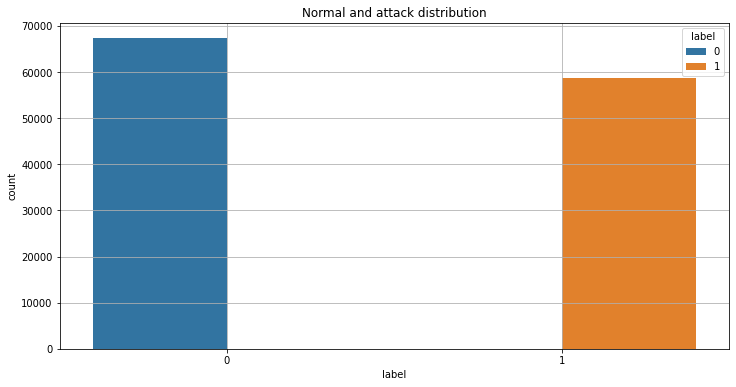

In [ ]:
# distribution plot of class 1 and class 0
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = train_data , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()

**3.1.3 Reading Test Data**

In [ ]:
# reading test data
test_data =  pd.read_table("KDDTest+.txt",sep = ',', names=fetaures_name)
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
#removing extra useless feature 
test_data = test_data.iloc[:,:-1]
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [ ]:
print("Shape of the test data",test_data.shape)
print("number of data points ",test_data.shape[0])
print("Number of feature ",train_data.shape[1])

Shape of the test data (22544, 42)
number of data points  22544
Number of feature  43


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

**3.1.4 :  Giving class labels to the attacks**

We give the following labels for better interpretation of the dataset:

1. Normal: 0
2. All other attacks: 1

In [ ]:
#stroing all the attack in the variable label    
label = test_data['attack'] 

# mapping all the attack to the desired output which is 0 and 1 
class_label = label.map(labeling)

#creating a new column called label in the training data
test_data['label'] = class_label

In [ ]:
print("shape of the test data",test_data.shape)
test_data.head(3)

shape of the test data (22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,0


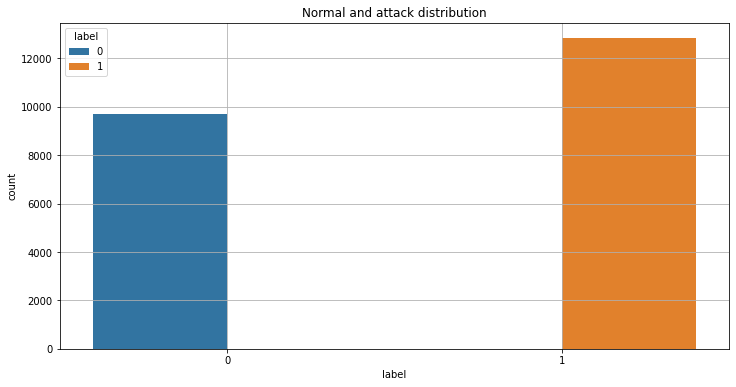

In [ ]:
#distribution plot of class 0 and class 1
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = test_data , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()

**Observations**
1. Both the train and test datasets contain 42 

2. 23 integers, 4 object values, 15 float values, and 23 integers

3. Although it appears that we do not have a null value, we 

4. In the distribution plot of classes 0 and 1, class 0 has more datapoints than class 1, and class 1 has more datapoints than class 0 in the test dataset.

#**3.2 Data Cleaning**

**Checking for Duplicate Values**

In [ ]:
# drop_duplicates () : this function return DataFrame with duplicate rows removed.
train_data = train_data.drop_duplicates(subset = fetaures_name[:-1] , keep ='first' , inplace = False)
train_data.shape

(125973, 43)

In [ ]:
#Checking for Null values
null_rows = train_data[train_data.isnull().any(1)]
print(null_rows)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack, label]
Index: []


**Observation**
1. There are no duplicate values
2. We don't have any null values.

#**3.3 Distribution of attacks in the dataset**

**3.3.1 Training Data**

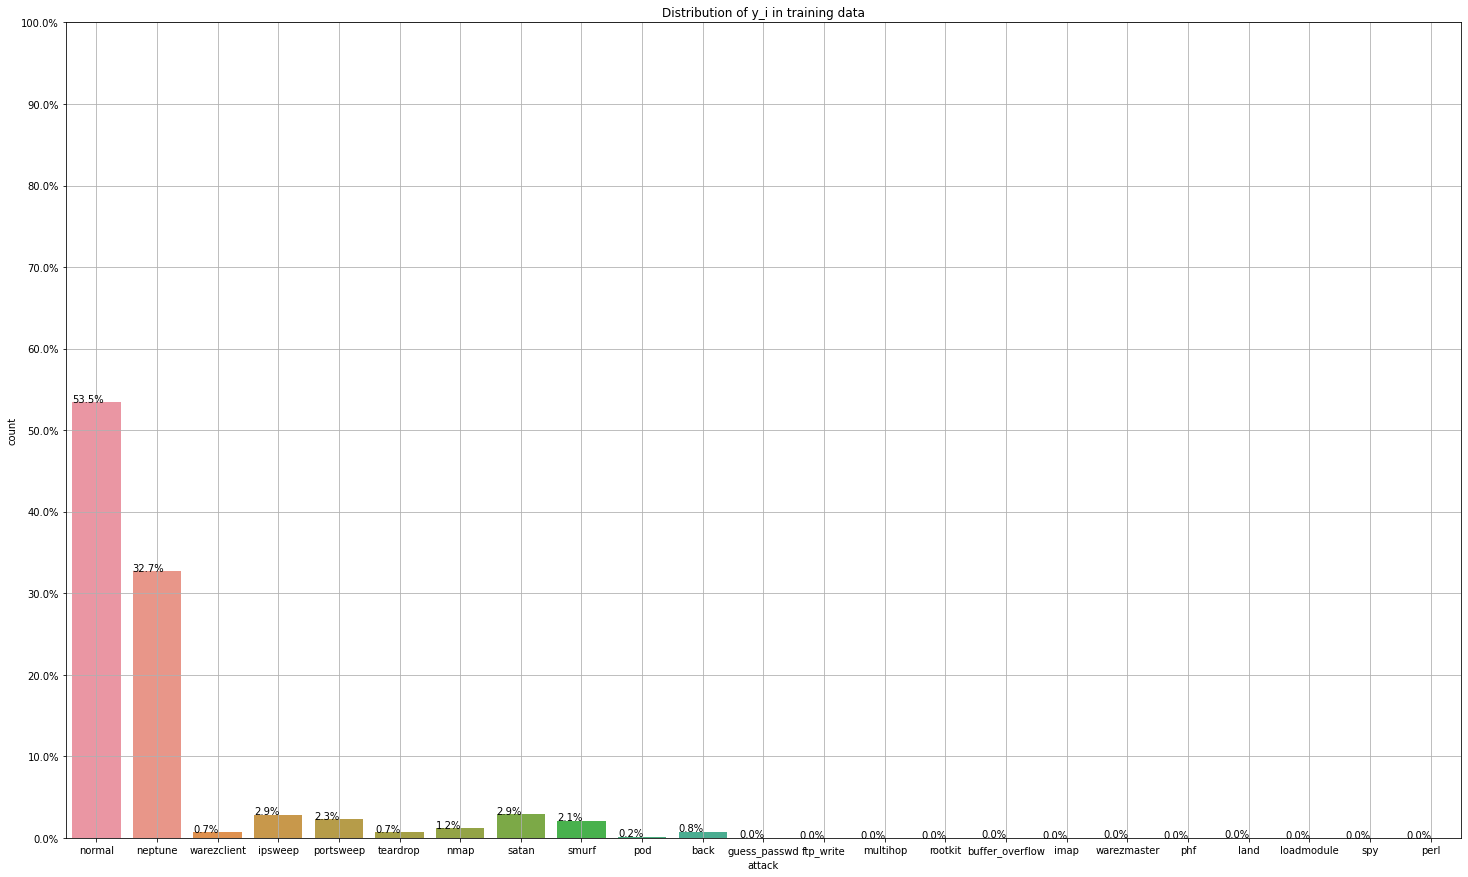

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25,15))

# we need the total number of data to find the percentage later.
total = len(train_data) * 1

# below code will simply plot bar plot where X axis is attack(23 classes) and y will simply count
ax = sns.countplot(x="attack", data=train_data)


# each p of patches(which is from the countplot) has height(number of data point for a given class ),width.
# then pass p to annotate(it is used to show text) and computing % of data in each class , give x coord and y coord of rectangle
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))


# In th yaxis we are giving interval(11 interval) of datapoints 
ax.yaxis.set_ticks(np.linspace(0, total, 11))


# adjust the ticklabel to the desired format, without changing the position of the ticks.
# map() need the function(what to do) and iterative
# below code : ax.yaxis.get_majorticklocs() - it will give 11 value from 0 to 125973 and we are dividing it with the total value which is 125973 after that we are getting 11 intervals with the percentile 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.title("Distribution of y_i in training data")
plt.grid()
plt.show()

In [ ]:
# take the all the class with datapoints belonging to each classes and sort them by label
train_class_distribution = train_data['attack'].value_counts()

# it is sorting them in decreasing order (by number of datapoints)
sorted_yi = np.argsort(-train_class_distribution.values)
# now for each i of the sorted datapoints we are printing the number of datapoints and the percetange
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/len(train_data)*100), 3), '%)')

Number of data points in class 1 : 67343 ( 53.458 %)
Number of data points in class 2 : 41214 ( 32.717 %)
Number of data points in class 3 : 3633 ( 2.884 %)
Number of data points in class 4 : 3599 ( 2.857 %)
Number of data points in class 5 : 2931 ( 2.327 %)
Number of data points in class 6 : 2646 ( 2.1 %)
Number of data points in class 7 : 1493 ( 1.185 %)
Number of data points in class 8 : 956 ( 0.759 %)
Number of data points in class 9 : 892 ( 0.708 %)
Number of data points in class 10 : 890 ( 0.707 %)
Number of data points in class 11 : 201 ( 0.16 %)
Number of data points in class 12 : 53 ( 0.042 %)
Number of data points in class 13 : 30 ( 0.024 %)
Number of data points in class 14 : 20 ( 0.016 %)
Number of data points in class 15 : 18 ( 0.014 %)
Number of data points in class 16 : 11 ( 0.009 %)
Number of data points in class 17 : 10 ( 0.008 %)
Number of data points in class 18 : 9 ( 0.007 %)
Number of data points in class 19 : 8 ( 0.006 %)
Number of data points in class 20 : 7 ( 0.

**Observations:**

In the above plot we have 23 different kind of attacks and their distributions :

1. data set is not uniform distributed as we can see in the above

2. there are lots of attacks where data points are very few and some of the attacks like normal and neptune these both have 85% datapoints out of 100% datapoints

3. There are 16 attacks out of 23 attacks where the data points are less then 1%

4. From this we see that : Normal has 53.5% datapoints and all other 22 class has 46.5% datapoints

5. Our dataset is imbalanced

**3.3.2 Test Data**

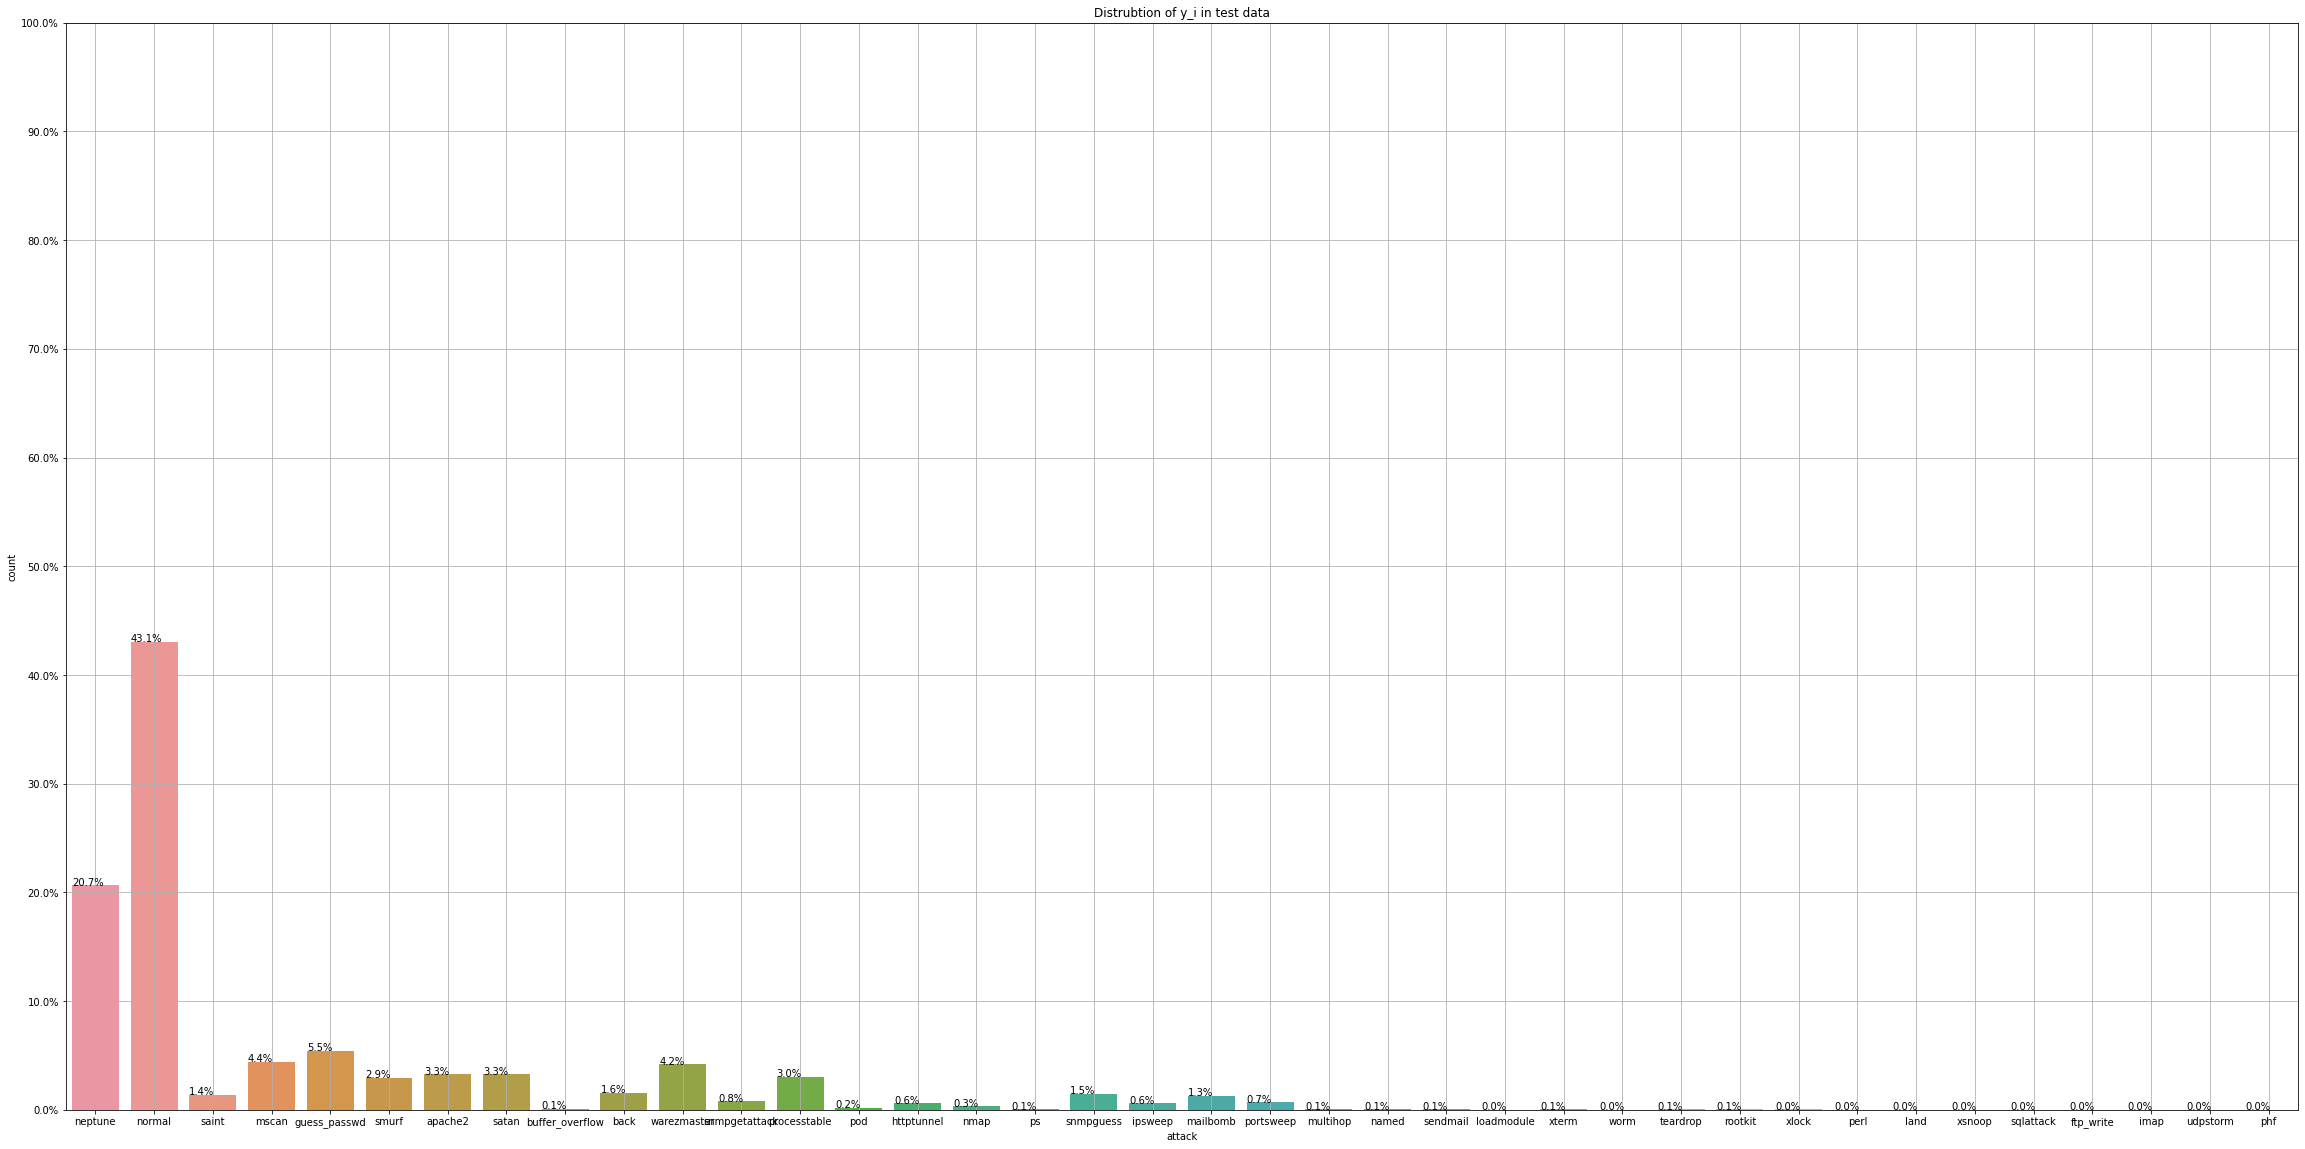

In [ ]:
#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(40,20))

# we need the total number of data to find the percentage later.
total = len(test_data) * 1

# below code will simply plot bar plot where X axis is attack(23 classes) and y will simply count
ax = sns.countplot(x="attack", data= test_data )

# each p has height(number of data point for a given class ),width.
# then pass p to annotate(it is used to show text) and computing % of data in each class , give x coord and y coord of rectangle
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))

# put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

# adjust the ticklabel to the desired format, without changing the position of the ticks.
# map() need the function(what to do) and iterative
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.grid()
plt.title("Distrubtion of y_i in test data")
plt.show()

In [ ]:
# take the all the class with datapoints belonging to each classes and sort them by label
test_class_distribution = test_data['attack'].value_counts()

# it is sorting them in decreasing order (by number of datapoints)
sorted_yi = np.argsort(-test_class_distribution.values)
# now for each i of the sorted datapoints we are printing the number of datapoints and the percetange
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution[i], '(', np.round((test_class_distribution.values[i]/len(test_data)*100), 3), '%)')


Number of data points in class 1 : 9711 ( 43.076 %)
Number of data points in class 2 : 4657 ( 20.657 %)
Number of data points in class 3 : 1231 ( 5.46 %)
Number of data points in class 4 : 996 ( 4.418 %)
Number of data points in class 5 : 944 ( 4.187 %)
Number of data points in class 6 : 737 ( 3.269 %)
Number of data points in class 7 : 735 ( 3.26 %)
Number of data points in class 8 : 685 ( 3.039 %)
Number of data points in class 9 : 665 ( 2.95 %)
Number of data points in class 10 : 359 ( 1.592 %)
Number of data points in class 11 : 331 ( 1.468 %)
Number of data points in class 12 : 319 ( 1.415 %)
Number of data points in class 13 : 293 ( 1.3 %)
Number of data points in class 14 : 178 ( 0.79 %)
Number of data points in class 15 : 157 ( 0.696 %)
Number of data points in class 16 : 141 ( 0.625 %)
Number of data points in class 17 : 133 ( 0.59 %)
Number of data points in class 18 : 73 ( 0.324 %)
Number of data points in class 19 : 41 ( 0.182 %)
Number of data points in class 20 : 20 ( 0.0

**Observation**

1. We have 38 classes in the test data.
2. the same story data is not uniform
3. The dataset is imbalanced

**3.2.3 Attacks which are not in the training data**

In [ ]:
# put train and test attack ina set and just find the difference we will get the classes.
trn = set(train_data['attack'].unique())
tst = set(test_data['attack'].unique())

extra = tst - trn

print(extra)
print("*"*100)
print("number of extra Attacks : ",len(extra))

{'httptunnel', 'processtable', 'sqlattack', 'named', 'xterm', 'saint', 'mscan', 'worm', 'sendmail', 'ps', 'mailbomb', 'udpstorm', 'snmpguess', 'xlock', 'xsnoop', 'apache2', 'snmpgetattack'}
****************************************************************************************************
number of extra Attacks :  17


In [ ]:
e_extra = tst - extra
print(e_extra)
print("*"*100)
print("Attacks which are present in both train and test data ", len(e_extra))

{'portsweep', 'guess_passwd', 'buffer_overflow', 'multihop', 'satan', 'teardrop', 'ftp_write', 'back', 'loadmodule', 'nmap', 'warezmaster', 'ipsweep', 'pod', 'smurf', 'land', 'normal', 'imap', 'perl', 'phf', 'neptune', 'rootkit'}
****************************************************************************************************
Attacks which are present in both train and test data  21


In [ ]:
ee_extra = trn - e_extra
print("Attacks which are present in train and not in  test data",ee_extra)

Attacks which are present in train and not in  test data {'warezclient', 'spy'}


**Observation:**

1. 17 more classes are present in the test data.
2. There are 21 attacks present in both the test and train datasets, but there are 2 classes that are present in both datasets: "spy" and "warezclient"


#**3.4 Univariate analysis on catagorical features**

**3.4.1 Univariate analysis on protocol_type**

**[i] How many category present in this feature**

In [ ]:
unique_proto = train_data['protocol_type'].value_counts()
print("Number of unique proto type : ", unique_proto.shape[0])
print(unique_proto)

Number of unique proto type :  3
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


**Observation:**

1. In the training data, there are three separate prototypal categories: TCP, UDP, and ICMP.
2. TCP receives many points, whereas UDP and ICMP receive little.


**[ii] Distribution of the this feature**

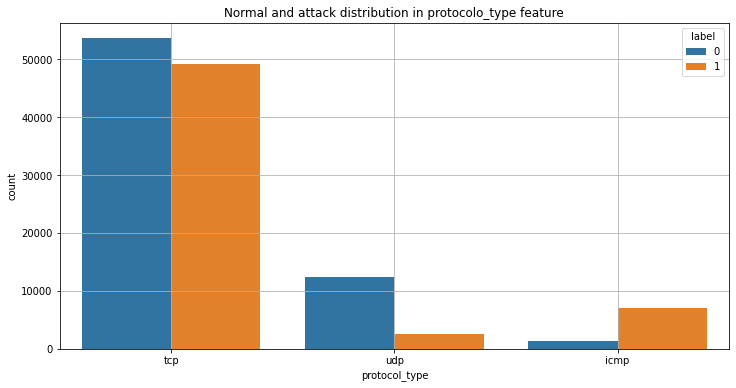

In [ ]:
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'protocol_type' , data = train_data , hue = 'label')
plt.title("Normal and attack distribution in protocolo_type feature")
plt.grid()
plt.show()

**Observation:**

1. Numerous points from the training data are associated with the tcp protocol type (102689). Only the tcp is consistent between normal and attack types.
2. The bulk of UDP protoypes belong to the regular class, however a small percentage also belong to the attack class. The majority of points in the icmp protocol type belong to the attack class.



**[iii] Featurizing using one hot encoding**

In [ ]:
prototype_vectorizer = CountVectorizer()
train_protocol_type_encoding = prototype_vectorizer.fit_transform(train_data['protocol_type'])
test_protocol_type_encoding = prototype_vectorizer.transform(test_data['protocol_type'])

In [ ]:
print("train_protocol_type_encoding is converted feature using one-hot encoding method. The shape of gene feature:",train_protocol_type_encoding.shape)
train_protocol_type_encoding 

train_protocol_type_encoding is converted feature using one-hot encoding method. The shape of gene feature: (125973, 3)


<125973x3 sparse matrix of type '<class 'numpy.int64'>'
	with 125973 stored elements in Compressed Sparse Row format>

**[iv] How good is this protocol_type feature in predicting y_i ?**

In [ ]:
# defining y_ture , y_test
y_true = train_data['label']
y_test = test_data['label']

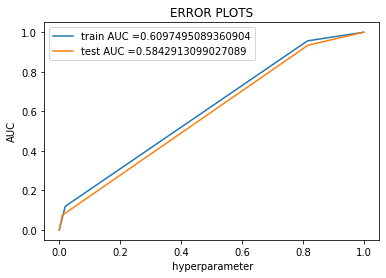

In [ ]:
DT_bow = DTC(criterion= 'gini', max_depth = 10 , min_samples_split =10 )
DT_bow.fit(train_protocol_type_encoding , y_true)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value
train_fpr, train_tpr, thresholds = roc_curve(y_true, DT_bow.predict_proba(train_protocol_type_encoding)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT_bow.predict_proba(test_protocol_type_encoding)[:,1]) 

# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
# to find important feature create a dataframe 
# pass data where we have the DTC attribute feature importance will give all the feature with important feature
# next pass the index where it will have the feature name coresponding to the feature importance value
# sort all the value desceding order

importance_feature = pd.DataFrame(data = DT_bow.feature_importances_.T, index = prototype_vectorizer.get_feature_names()).sort_values(by = 0, ascending=False)[:20]
print("Top 20 important features :",importance_feature)

Top 20 important features :             0
udp   0.59247
icmp  0.40753
tcp   0.00000


**Observation:**

We learn that this feature may be useful in predicting the yi when we build the actual model utilising all features because I am receiving a 58 auc score while using just this feature. According to the modelling, udp is the category that is most significant, whereas icmp is not at all important.


**3.4.2 Univariate analysis on service**

**[i] How many category present in this feature**

In [ ]:
unique_service = train_data['service'].value_counts()
print("Number of unique service : ",unique_service.shape[0])
print(unique_service.head())

Number of unique service :  70
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


**Observation:**

Two services are available. Private and HTTP have a lot more data points than the others.


**[ii] Distribution of the this feature**

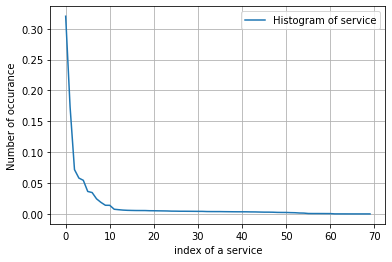

In [ ]:
s = sum(unique_service.values)
h = unique_service.values/s
plt.plot( h , label = 'Histogram of service')
plt.xlabel('index of a service')
plt.ylabel('Number of occurance')
plt.legend()
plt.grid()
plt.show()

**Observation:**

1. This distribution is skewed.
2. Few services occur more frequently than others, and most services happen more quickly 
3. In this distribution, the services are listed in decreasing order from left to right (frequency).
4. The http is contained in the 0th index, private in the 1st index, etc.


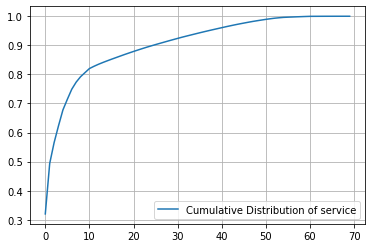

In [ ]:
c = np.cumsum(h)
plt.plot(c , label = "Cumulative Distribution of service")
plt.grid()
plt.legend()
plt.show()

**Observation:**

90% of the data was given by the top 20 to 25 services. that indicates that certain services are offered much more frequently than others.


**[iii] Featurizing using one hot encoding**

In [ ]:
service_encode = CountVectorizer()
train_service_encoding = service_encode.fit_transform(train_data['service'])
test_service_encoding = service_encode.transform(test_data['service'])

In [ ]:
print("train_service_encoding is converted feature using one-hot encoding method. The shape of gene feature:",train_service_encoding.shape)

train_service_encoding is converted feature using one-hot encoding method. The shape of gene feature: (125973, 70)


**[iv] How good is this protocol_type feature in predicting y_i ?**

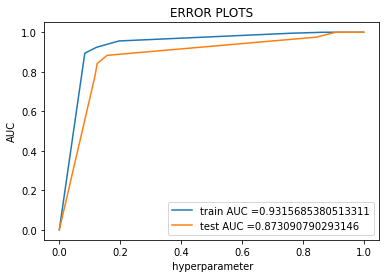

In [ ]:
from sklearn.metrics import roc_curve, auc

DT_bow = DTC(criterion= 'gini', max_depth = 5 , min_samples_split = 5 )
DT_bow.fit(train_service_encoding , y_true)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value    
train_fpr, train_tpr, thresholds = roc_curve(y_true, DT_bow.predict_proba(train_service_encoding)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT_bow.predict_proba(test_service_encoding)[:,1]) 


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
# to find important feature create a dataframe 
# pass data where we have the DTC attribute feature importance will give all the feature with important feature
# next pass the index where it will have the feature name coresponding to the feature importance value
# sort all the value desceding order

importance_feature = pd.DataFrame(data = DT_bow.feature_importances_.T, index=service_encode.get_feature_names()).sort_values(by = 0, ascending=False)[:10]
print("Top 20 important features :",importance_feature)

Top 20 important features :                  0
http      0.463197
domain_u  0.203933
smtp      0.183391
ftp_data  0.102067
other     0.047413
nntp      0.000000
ntp_u     0.000000
pm_dump   0.000000
pop_2     0.000000
pop_3     0.000000


**Observation:**

My model yields an interesting 87 test auc value using only this one feature. Only 5 of the 70 features are crucial. This knowledge could be helpful for feature engineering (we can remove feature with 0.0 values)

**3.4.3 Univariate analysis on Flag**

**[i] How many category present in this feature**

In [ ]:
flag_unique = train_data['flag'].value_counts()
print("Number of unique flag : ", flag_unique.shape[0])
print(flag_unique.head())

Number of unique flag :  11
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64


**[ii] Distribution of the this feature**

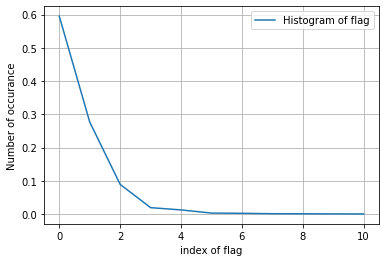

In [ ]:
# taking sum
s = sum(flag_unique.values)
# diving each falg vaue to sum
h = flag_unique.values/s
plt.plot(h , label = 'Histogram of flag')
plt.xlabel("index of flag")
plt.ylabel('Number of occurance')
plt.grid()
plt.legend()
plt.show()

**Note:** there are three to four flags with a skewed distribution of the number of occurrences.

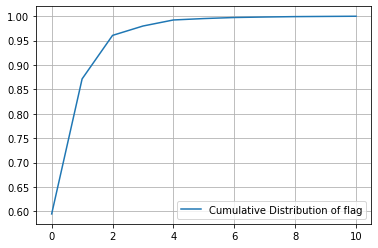

In [ ]:
c = np.cumsum(h)
plt.plot(c , label = 'Cumulative Distribution of flag')
plt.legend()
plt.grid()
plt.show()

**Note:** Four flags out of ten contributed 98–99% of the data, and these four flags are appearing increasingly frequently.

**[iii] Featurizing using one hot encoding**

In [ ]:
flag_encoding = CountVectorizer()
train_flag_encoding = flag_encoding.fit_transform(train_data['flag'])
test_flag_encoding = flag_encoding.transform(test_data['flag'])

In [ ]:
print("train_flag_encoding is converted feature using one-hot encoding method. The shape of gene feature:",train_flag_encoding.shape)

train_flag_encoding is converted feature using one-hot encoding method. The shape of gene feature: (125973, 11)


**[iv] How good is this protocol_type feature in predicting y_i ?**

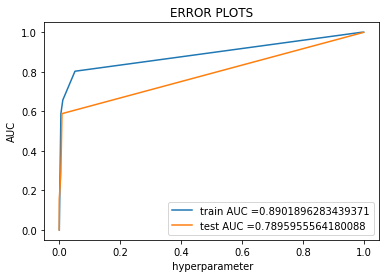

In [ ]:
from sklearn.metrics import roc_curve, auc

DT_bow = DTC(criterion= 'gini', max_depth = 5 , min_samples_split = 10 )
DT_bow.fit(train_flag_encoding , y_true)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value       
train_fpr, train_tpr, thresholds = roc_curve(y_true, DT_bow.predict_proba(train_flag_encoding)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT_bow.predict_proba(test_flag_encoding)[:,1])


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
# to find important feature create a dataframe 
# pass data where we have the DTC attribute feature importance will give all the feature with important feature
# next pass the index where it will have the feature name coresponding to the feature importance value
# sort all the value desceding order

importance_feature = pd.DataFrame(data = DT_bow.feature_importances_.T, index=flag_encoding.get_feature_names()).sort_values(by = 0, ascending=False)[:11]
print("Top 20 important features :",importance_feature)

Top 20 important features :                0
sf      0.954620
s0      0.026476
s1      0.011691
s2      0.003657
rej     0.003556
oth     0.000000
rsto    0.000000
rstos0  0.000000
rstr    0.000000
s3      0.000000
sh      0.000000


**Observation:**

The model may appear to be overfitting when examining the train and test auc values, however we have 78 test auc values, indicating that the model will be helpful. The most significant category is "sf," which has a value of 95 in and of itself.


**3.5 Univariate analysis on some continuous features**

**1.Duration**

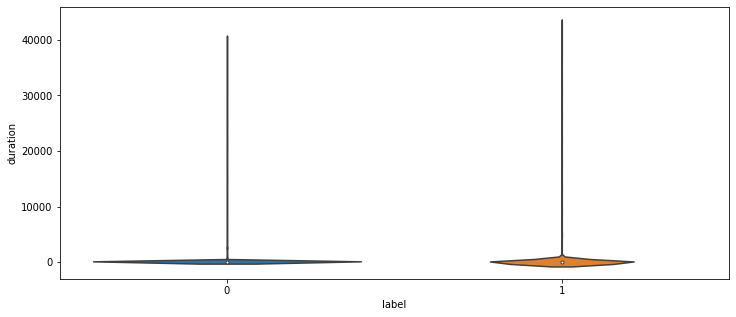

In [ ]:
plt.figure(figsize =(12,5))
# violin plot
sns.violinplot(x ='label' , y = 'duration' , data = train_data )
plt.show()

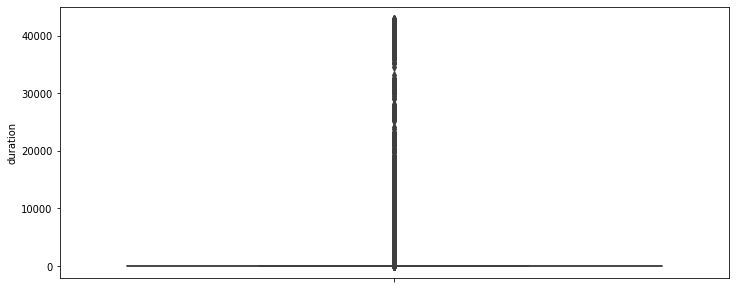

In [ ]:
plt.figure(figsize =(12,5))
# violin plot
sns.boxplot(y ='duration' ,  data = train_data )
plt.show()

**Observation:**

Because the majority of the duration is 0, the mean, median, 25th, 50th, and 75th percentiles are too small to analyse.



In [ ]:
for i in range(0,100,10):
    # take all the value of duration column
    var = train_data['duration'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 0
40 percentile value 0
50 percentile value 0
60 percentile value 0
70 percentile value 0
80 percentile value 0
90 percentile value 0
100 percentile value is  42908


**Observation:**

The duration value at the 90th percentile is 0, but there are several values at the 100th percentile, therefore let's examine the range from 90 to 100th percentile.


In [ ]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = train_data['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 1
94 percentile value is 2
95 percentile value is 4
96 percentile value is 15
97 percentile value is 31
98 percentile value is 2052
99 percentile value is 9592
100 percentile value is  42908


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 9592
99.1 percentile value is 10910
99.2 percentile value is 12666
99.3 percentile value is 13858
99.4 percentile value is 16693
99.5 percentile value is 19981
99.6 percentile value is 25761
99.7 percentile value is 30679
99.8 percentile value is 37141
99.9 percentile value is 39984
100 percentile value is  42908


**Observation:**

From the 90th percentile on, the duration's value has risen. If we examine the violine plot for class label 1, there are some values that may range from 2k to 3k from the 99.0 to the 100 percentile, substantially increasing the value. These values may be outliers.


**2 . src_bytes :**
number of data bytes from source to destination

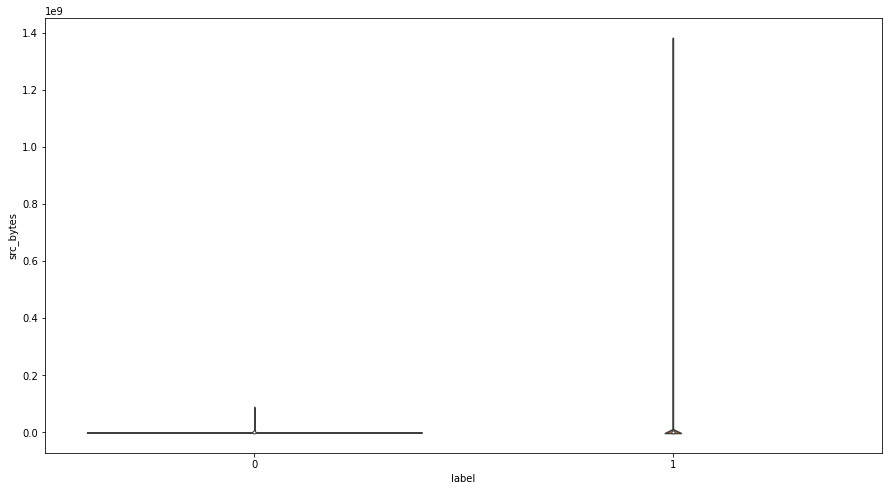

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'label' , y = 'src_bytes' , data = train_data)
plt.show()

**Observation:**

It is challenging to analyse both label 0 and label 1. However, class 1, which attacks, has a far higher value than class 0, which is normal.

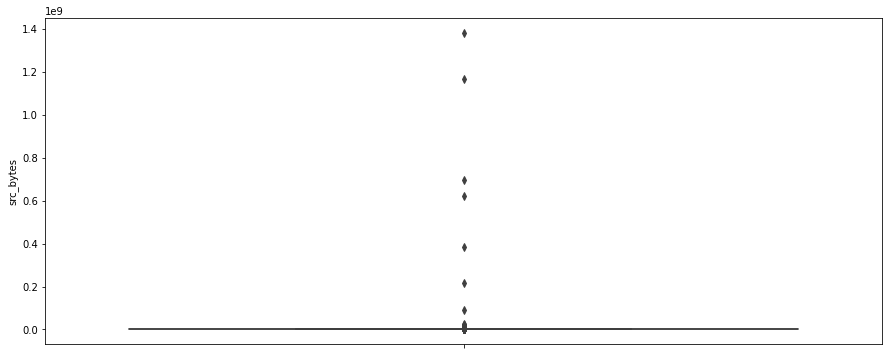

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'src_bytes' ,data = train_data)
plt.show()

In [ ]:
# CALCULATING PERCENTILE FROM 0,10,20,30,...,100
for i in range(0,100,10):
    var = train_data['src_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 1
50 percentile value is 44
60 percentile value is 192
70 percentile value is 235
80 percentile value is 307
90 percentile value is 848
100 percentile is  1379963888


**Observation:**

As we can see there is a big jump from 90% to 100 %

In [ ]:
# calculating percentile from 90,91,92,...,100
for i in range(90,100):
    var = train_data['src_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

90 percentile value is 848
91 percentile value is 1006
92 percentile value is 1032
93 percentile value is 1087
94 percentile value is 1264
95 percentile value is 1480
96 percentile value is 1830
97 percentile value is 2974
98 percentile value is 8737
99 percentile value is 54540
100 percentile is  1379963888


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['src_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 54540
99.1 percentile value is 54540
99.2 percentile value is 54540
99.3 percentile value is 54540
99.4 percentile value is 54540
99.5 percentile value is 54540
99.6 percentile value is 175337
99.7 percentile value is 501760
99.8 percentile value is 2194619
99.9 percentile value is 2194619
100 percentile value is  1379963888


**Observation:**

The fact that 1379963888byte, or 1.28GB, travels from source to destination at 100% is quite valuable.

**3.dst_bytes:**
number of data bytes from destination to source

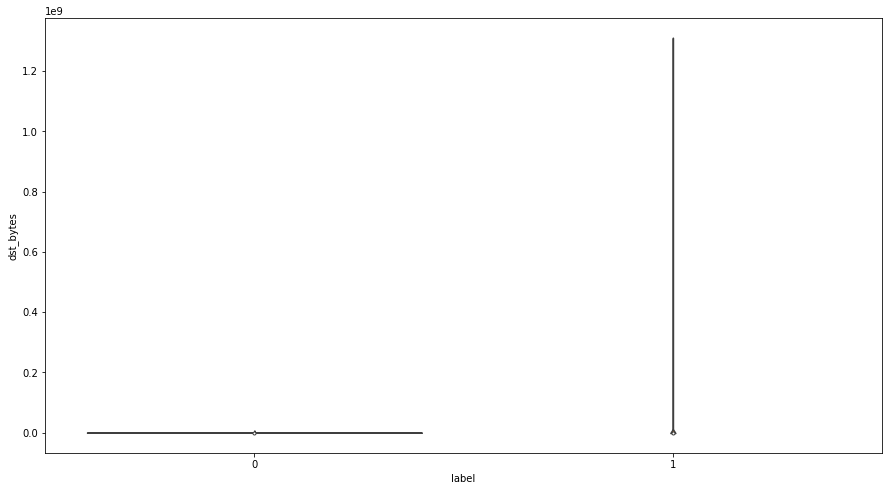

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'label' , y = 'dst_bytes' , data = train_data)
plt.show()

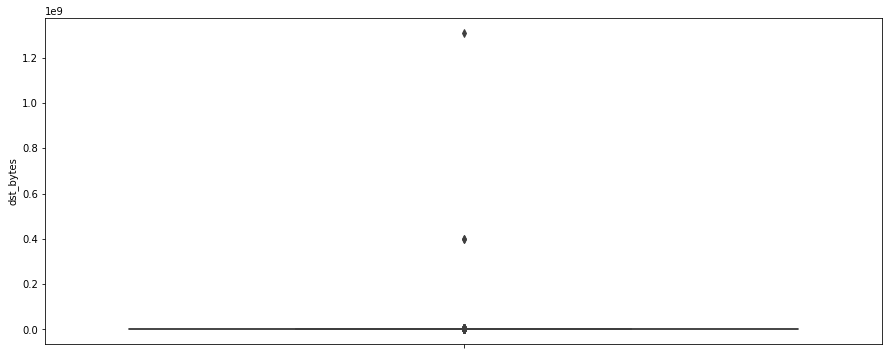

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'dst_bytes' ,data = train_data)
plt.show()

In [ ]:
# CALCULATING PERCENTILE FROM 0,10,20,30,...,100
for i in range(0,100,10):
    var = train_data['dst_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 110
70 percentile value is 334
80 percentile value is 1085
90 percentile value is 3376
100 percentile is  1309937401


In [ ]:
# calculating percentile from 90,91,92,...,100
for i in range(90,100):
    var = train_data['dst_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

90 percentile value is 3376
91 percentile value is 4058
92 percentile value is 4777
93 percentile value is 5876
94 percentile value is 7273
95 percentile value is 8314
96 percentile value is 9432
97 percentile value is 11715
98 percentile value is 15342
99 percentile value is 25519
100 percentile is  1309937401


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['dst_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 25519
99.1 percentile value is 27264
99.2 percentile value is 29122
99.3 percentile value is 31377
99.4 percentile value is 34030
99.5 percentile value is 37236
99.6 percentile value is 42766
99.7 percentile value is 52225
99.8 percentile value is 81172
99.9 percentile value is 235008
100 percentile value is  1309937401


**Observation:**

There is also a significant value in the 100%, where 1.21GB or 1309937401bytes travel from source to destination.

**4. wrong_fragment:**
IP fragmentation is an Internet Protocol (IP) process that breaks packets into smaller pieces (fragments)

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'label' , y = 'wrong_fragment' , data = train_data)
plt.show()

**Observation:**


*   Class 1 has a lot more variation than Class 
*   There are certain differences between class 0 and 1, 




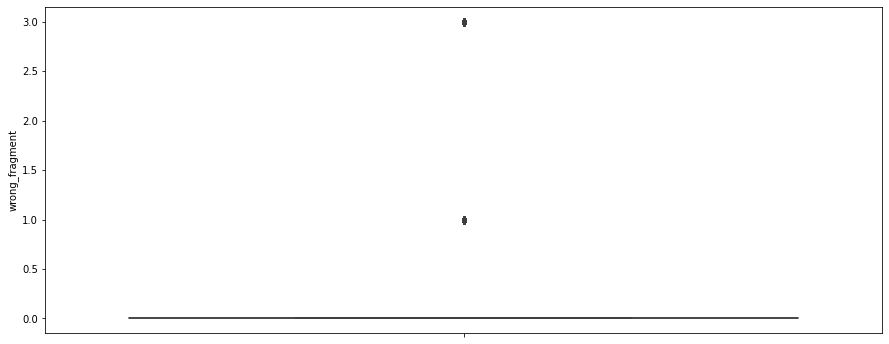

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'wrong_fragment' ,data = train_data)
plt.show()

In [ ]:
# CALCULATING PERCENTILE FROM 0,10,20,30,...,100
for i in range(0,100,10):
    var = train_data['wrong_fragment'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile is  3


In [ ]:
# calculating percentile from 90,91,92,...,100
for i in range(90,100):
    var = train_data['wrong_fragment'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 0
97 percentile value is 0
98 percentile value is 0
99 percentile value is 0
100 percentile is  3


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['wrong_fragment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 0
99.1 percentile value is 0
99.2 percentile value is 1
99.3 percentile value is 3
99.4 percentile value is 3
99.5 percentile value is 3
99.6 percentile value is 3
99.7 percentile value is 3
99.8 percentile value is 3
99.9 percentile value is 3
100 percentile value is  3


**Observation:**

this feature seems to be ok as there is not so much inflection

**3.6 Bivariate Analysis (pair plots)**

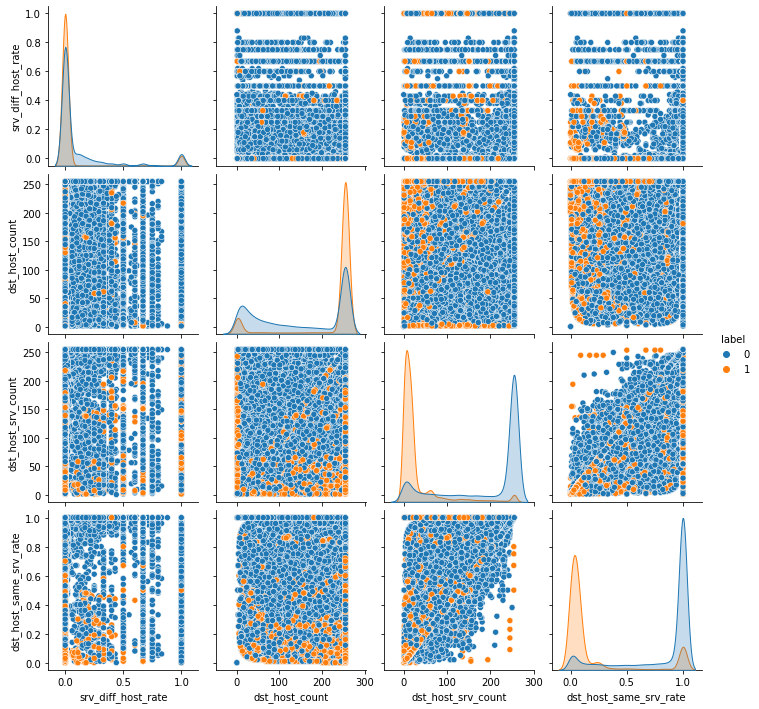

In [ ]:
n = train_data.shape[0]
sns.pairplot(train_data[['srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate', 'label']][0:n], hue='label', vars=['srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate'])
plt.show()

**Observation:**

if we look the dst_host_count and dst_host_same_srv_rate feature there are some point (not fully) but partially separeble ,but there are some overlap point also.
dst_hst_srv_count and dst_host_count here also in the middle there are some overlap and some of the datapoints are partially separable
If we look at the pdf of these 4 feature
- srv_diff_host_rate : the class 0 have higer value than class 1 - dst_host_count : all over the class 1 is placed and have much higher value than class 0 - dst_host_srv_count : there is some over lap region between class 1 and 0, class 1 have higher value than class 0. - dst_host_same_srv_rate : it look both class 1 and class 0 separated ,but there are quite overlap datapoints.

lets try to analyse dst_host_srv_count and dst_host_same_srv_rate

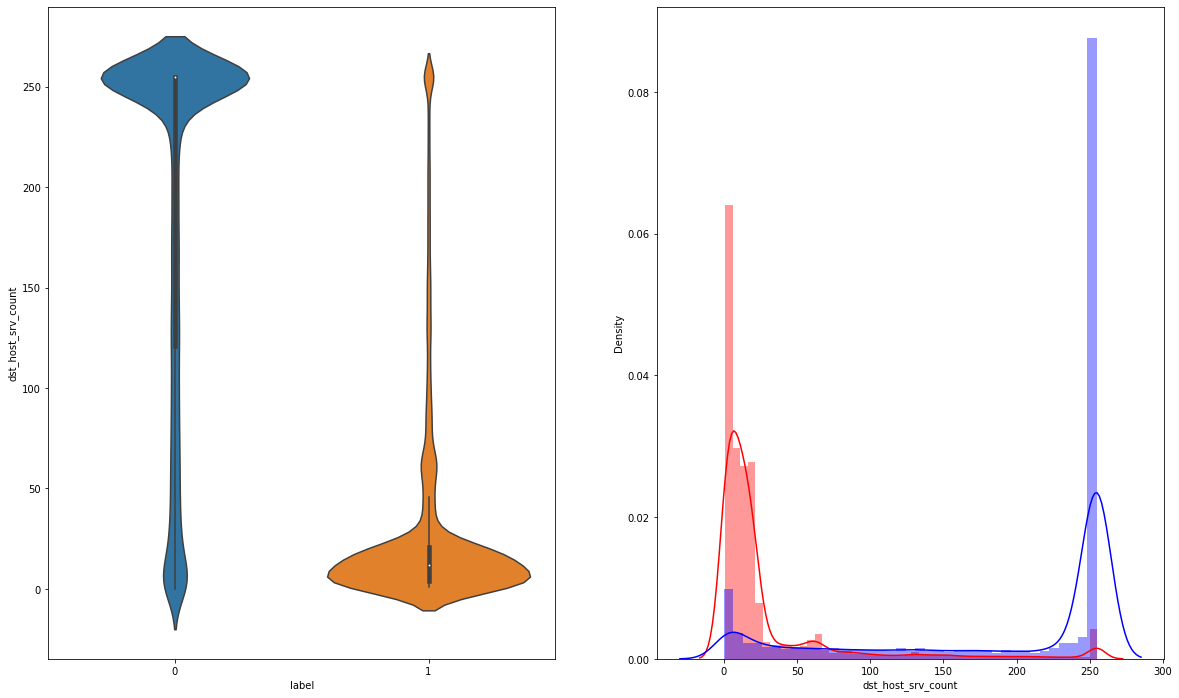

In [ ]:
plt.subplots(figsize = (20,12))
plt.subplot(1,2,1)
sns.violinplot(x = 'label',y = 'dst_host_srv_count',data = train_data )

plt.subplot(1,2,2)
sns.distplot(train_data[train_data['label'] == 1]['dst_host_srv_count'][0:] , label = '1' ,color = 'red' )
sns.distplot(train_data[train_data['label'] == 0]['dst_host_srv_count'][0:] , label = '0' ,color = 'blue' )
plt.show()

**Observation:**

In this instance, the classes do not completely overlap (in terms of the 25th, 50th, and 75th percentiles), hence this dst host same srv rate has some separability.

**3.7 Multivariate analysis using TSNE**

In [ ]:
# Using TSNE lets visualize the data from 32dim(continuous variable) to 2 dim
train_data_sample = train_data[0:7000]
# why minmax ? : actually there is no specific reason beacuse i have tried both and both of them working similarly for this case.
X = MinMaxScaler()
# we have 32 continuous feature.
X  = X.fit_transform(train_data_sample[["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]])
y = train_data_sample['label'].values

In [ ]:
tsne1 = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=2, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.001s...
[t-SNE] Computed neighbors for 7000 samples in 1.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.014220
[t-SNE] Computed conditional probabilities in 0.390s
[t-SNE] Iteration 50: error = 86.4141235, gradient norm = 0.0355779 (50 iterations in 3.449s)
[t-SNE] Iteration 100: error = 71.4853973, gradient norm = 0.0068819 (50 iterations in 2.378s)
[t-SNE] Iteration 150: error = 67.9728699, gradient norm = 0.0036395 (50 iterations in 2.315s)
[t-SNE] Iteration 200: error = 

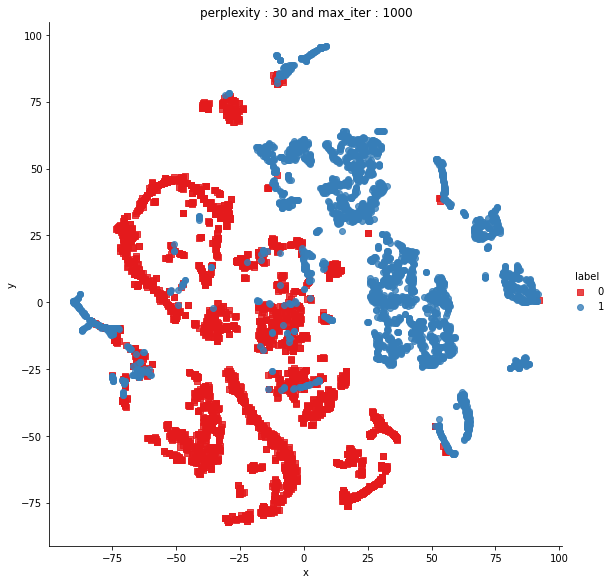

In [ ]:
# creating a dataframe by puting a dict : where x will have all the value from 1st col and y will have value of 2nd col
# tsne have emmbeding vector of size (7000,2)
df = pd.DataFrame({'x':tsne1[:,0], 'y':tsne1[:,1] ,'label':y})

# drawing the plot in appropriate place in the grid
# implot is basically a combination of facetgrid and regplot.
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",size=8,markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [ ]:
tsne1 = TSNE(n_components=2, perplexity=50.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=2, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.000s...
[t-SNE] Computed neighbors for 7000 samples in 1.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.020443
[t-SNE] Computed conditional probabilities in 0.597s
[t-SNE] Iteration 50: error = 81.3605499, gradient norm = 0.0327643 (50 iterations in 3.576s)
[t-SNE] Iteration 100: error = 66.3926849, gradient norm = 0.0060834 (50 iterations in 2.843s)
[t-SNE] Iteration 150: error = 63.5308914, gradient norm = 0.0030317 (50 iterations in 2.760s)
[t-SNE] Iteration 200: error =

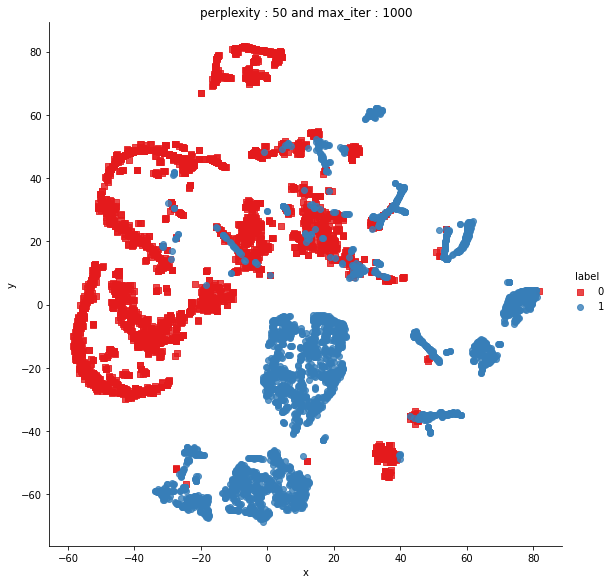

In [ ]:
df = pd.DataFrame({'x':tsne1[:,0], 'y':tsne1[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(50, 1000))
plt.show()

In [ ]:
tsne1 = TSNE(n_components=2, perplexity=15.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=2, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)


[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.000s...
[t-SNE] Computed neighbors for 7000 samples in 1.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.009311
[t-SNE] Computed conditional probabilities in 0.201s
[t-SNE] Iteration 50: error = 94.7155151, gradient norm = 0.0340886 (50 iterations in 2.979s)
[t-SNE] Iteration 100: error = 78.8077698, gradient norm = 0.0087660 (50 iterations in 3.116s)
[t-SNE] Iteration 150: error = 74.2628479, gradient norm = 0.0059329 (50 iterations in 2.820s)
[t-SNE] Iteration 200: error = 

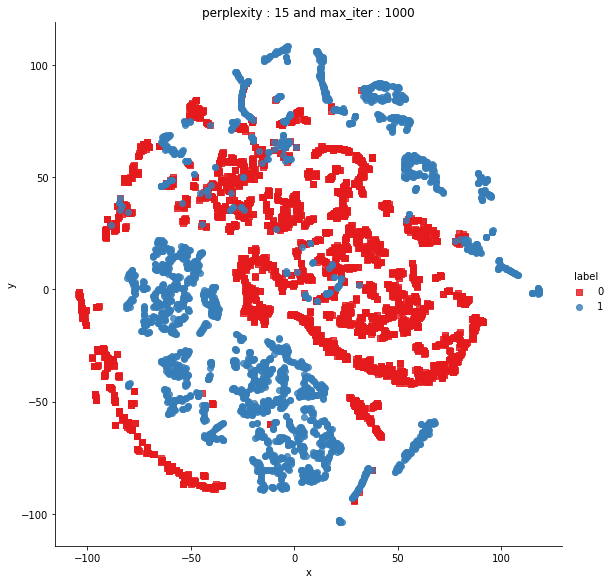

In [ ]:
df = pd.DataFrame({'x':tsne1[:,0], 'y':tsne1[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(15, 1000))
plt.show()

**Observation:**

We can see that these 32 continuous variables will be useful in identifying the class label by taking them and reducing them to 2 dim from the 3 plot.
The class 1 and class 0 are divided in the first plot, where the perplexity is 30, however there are some areas where they overlap. Plots 2 and 3 both present the same narrative, as can be seen.

#**Summary of EDA**

 

*   After reading the dataset got to know that these dataset have not the feature name in their appropriate column so columns name were given
*  Shape of the training data (datapoints : 125973, features : 42)
Shape of the test data (datapoints : 22544, features : 42)
The task is to identify wether a given connection is normal or attack , for that created a column "label" and gave all the attacks which is name normal as class 0 and all other attack as class 1.
*   By checking the distribution of the dataset with respect to the class label ,found that dataset is little bit imbalanced(53.5% normal and 46.5% attack).
*   Checked for duplicate and null value : there were not null and duplicate value.
*   Checked for distribution with respect to different attacks in train and test dataset :
Train data * data set is not uniform distributed (by looking at different attacks) * there are lots of attacks where data points are very few and some of the attacks like normal and neptune these both have 85% datapoints out of 100% datapoints * There are 16 attacks out of 23 attacks where the data points are less then 1% Test data * look at the test dataset we got bunch of new attacks which are not in the test data * here also the normal and neptune attacks has more datapoints than other
*   To analysis the feature i thought to analyse the categorical feature and numerical feature separetly.

**Univariate analysis on categorical feature**

we have 3 categorical feature : protocol_type , service and flag

to analysis these categorical features we have gone through the following 4 things

**1. Number of category present in the dataset :**
- The majority of the points are from tcp and udp in the protocol feature: 3 category section. - In-service feature: 70 distinct categories are available
- There are 11 distinct categories in the flag feature.

**2. Distribution of the categorical feature :**
TCP has adequate normal and attack class datapoints, however udp has more class0 (normal) points than class1 (attack) and icmp has more class 1 datapoints, according to protocol feature. - In the service feature, the distribution is skewed, with a few services occurring more frequently and the majority of services occurring less frequently. - In the flag feature, the distribution is also skewed.

**3. featurization of the categorical feature :**
All of them have been featured using one hot encoding

**4. How good is this protocol_type feature in predicting y_i ?**
Creating a straightforward model (a Decison tree classifier) for each categorical feature and identifying its significance. - In protocol feature, we obtain some feature importance, with udp serving as the primary factor in yi prediction. in which icmp is lower

 -**In service feature :** This categorical feature will be helpful when we design the actual model because the model achieved a test auc value of 87 by utilising only this feature. There are a select few features that are significant.            

 -**In flag feature:** This feature is particularly helpful because the model may overfit slightly due to the gap between the train and test auc scores (78).

We can perform some feature engineering by removing the features that the model determined are not at all important from certain categories.

**Univariate analysis on continuous feature:**

**Duration :** The majority of points for this feature have a value of zero; values start to change at the 98th percentile.

**src_bytes :** Values of this feature are rising gradually up to 98–99.9, but suddenly, at the 100 percentile, a high number (1.25 gb) appears, indicating that 1.25 gigabytes of data is transferred from source to destination. This unexpected rise may be an outlier.

**dst_bytes :** This is the same as the src byte; in the 100 percentile, there is a large number (1.21 gb of data from source to destination); this may be an outlier, or these values could be an indication of an attack.

**wrong_fragment :** Class 1 in the violin plot has greater variance than class 1, while class 0 has values close to zero.

**Bivariate Analysis using pair plot:**

1. We can infer from the pair plot that there is some, but not complete, overlap between class 1 and class 0.

2. Each feature's PDF contains some information, such as which PDF (class 0) is more valuable than which (class 1) and vice versa. With this knowledge, I examined the violin plot and the PDF separately of several features, some of which did not totally overlap, allowing us to say that these features may be useful in differentiating between class 0 and class 1.

**Multivariate analysis using tSNE:**

I used tsne to plot 32 features with 7k data points, and the outcome is fairly impressive because the classes are distinct and there are fewer overlapping spots.


#**4. Machine Learning Models**

Following Machine Learning Models have been built to compare their performance when it comes to intrusion detection performance:

1. Naive Bayes (Base line model)
2. Naive Bayes with hyperparameter tuning
3. KNN
4. Decision Tree
5. Random Forest
6. Xgboost

**Merging all numerical and categorical feature**


In [ ]:

"""
A = coo_matrix([[1, 2], [3, 4]])
B = coo_matrix([[5], [6]])
hstack([A,B]).toarray()
array([[1, 2, 5],
       [3, 4, 6]])
"""
# take protocol_type one_hot_encoding vector and service one_hot_encoding vector and merge them using hstack
train_protocol_service_encoding = hstack((train_protocol_type_encoding, train_service_encoding))
test_protocol_service_encoding = hstack((test_protocol_type_encoding,  test_service_encoding))

# take train_proto_services_encoding vector and flag one_hot_encoding vector and merge them using hstack
train_protocol_service_flag_encoding = hstack((train_protocol_service_encoding, train_flag_encoding))
test_protocol_service_flag_encoding  = hstack((test_protocol_service_encoding ,test_flag_encoding))

# defining y_train and y_test
y_train = train_data['label']
y_test  = test_data['label']

# removing label, attck,protocol_type,service,flag column from train and test data
train_data.drop(['protocol_type','service','flag','attack','label'], axis=1, inplace=True)
test_data.drop(['protocol_type','service','flag','attack','label'], axis=1, inplace=True)

X_train = hstack((train_protocol_service_flag_encoding , train_data))
X_test = hstack((test_protocol_service_flag_encoding , test_data))

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean = False)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
print("Shape of the training data after mergeing - datapoints : ",X_train.shape[0],"features : ",X_train.shape[1],  " and y_train :",y_train.shape[0])
print("Shape of the test data after mergeing - datapoints : ",X_test.shape[0],"features : ",X_test.shape[1]," and y_test : ",y_test.shape[0])

Shape of the training data after mergeing - datapoints :  125973 features :  122  and y_train : 125973
Shape of the test data after mergeing - datapoints :  22544 features :  122  and y_test :  22544


**Plot : Confusion matrix , Precision , Recall**

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.'
# refer - AAIC
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("Orange")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

**4.1 Base line Model - Naive Bayes**

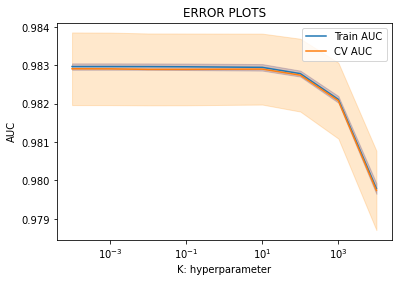

In [ ]:
# creating object of multinomial naive bayes
multi_NB = MultinomialNB()

# giving bunch of laplace parameter
parameters = {'alpha': [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]}
alpha_range = [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]

# putting the model in grid search cv to find the best hyper param 
clf = GridSearchCV(multi_NB ,parameters,cv = 10 , scoring='roc_auc' , return_train_score = True)

#fitting X_train and y_train with the multinomial naive bayes
clf.fit(X_train, y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(alpha_range, train_auc, label='Train AUC')
# refer : https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_range, cv_auc, label='CV AUC')
# refer : https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

**fitting with best parameters**

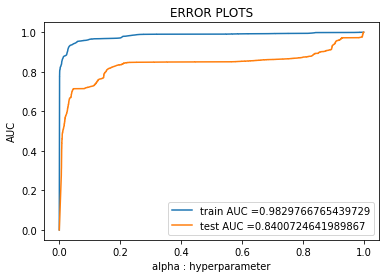

In [ ]:
from sklearn.metrics import roc_curve, auc

multi_NB =MultinomialNB(alpha = 0.01)
multi_NB.fit(X_train,y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train, multi_NB.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, multi_NB.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = multi_NB.predict(X_train)
y_test_pred = multi_NB.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9258446608869385
Test f1 score 0.7687546886721681
****************************************************************************************************
train recall score / detection rate 0.8852294047415998
test recall score / detection rate 0.6388217875788982


Train confusion_matrix


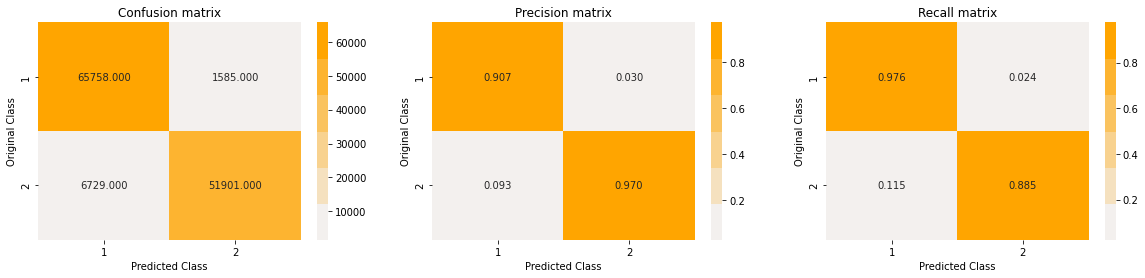

Test confusion_matrix


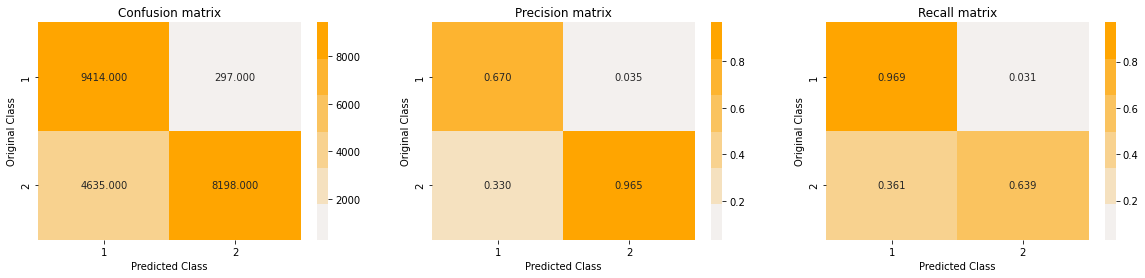

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

*   Test auc 64 indicates a 64% chance of accurately classifying the points.
*   The F1 score is the opposite of the average of precision and recall. It will be highly valuable when both recall and precision are good.

**reading precsion and reacll matrix :-**

*   precision (columns add up to 1): Of all the points projected to belong to class 0, 67% actually do, and 33% actually belong to class 1.
*   recall(row sums to 1): Of the points that actually belong to class 1, 63% are projected to be in class 1, and 36% are anticipated to be in class 0.








**Observation :**
there is a gap in trian and test AUC value which mean the model is overfitting
lets do some feature selection to reduce the overfitting
feature selection by Recursive feature elemination

**4.2 Naive Bayes with Hyperparameter tuning**

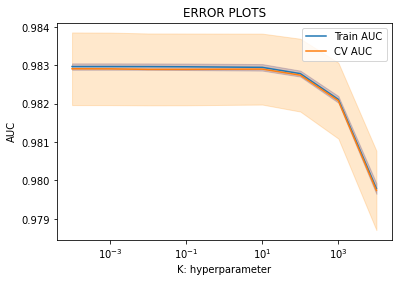

In [ ]:
# creating object of multinomial naive bayes
multi_NB = MultinomialNB()

# giving bunch of laplace parameter
parameters = {'alpha': [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]}
alpha_range = [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]

# putting the model in grid search cv to find the best hyper param 
clf = GridSearchCV(multi_NB ,parameters,cv = 10 , scoring='roc_auc' , return_train_score = True)

#fitting X_train and y_train with the multinomial naive bayes
clf.fit(X_train, y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(alpha_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

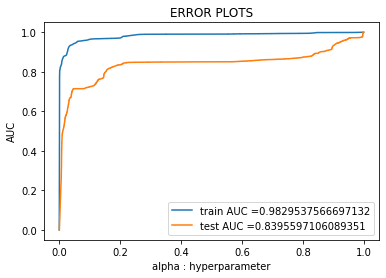

In [ ]:
multi_NB =MultinomialNB(alpha = 10)
multi_NB.fit(X_train,y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train, multi_NB.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, multi_NB.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = multi_NB.predict(X_train)
y_test_pred = multi_NB.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9258023656182541
Test f1 score 0.7682926829268292
****************************************************************************************************
train recall score / detection rate 0.8851100119392802
test recall score / detection rate 0.6381983947635004


Train confusion_matrix


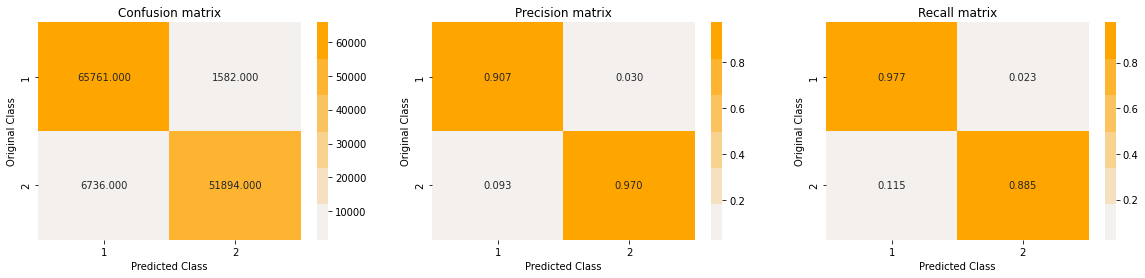

Test confusion_matrix


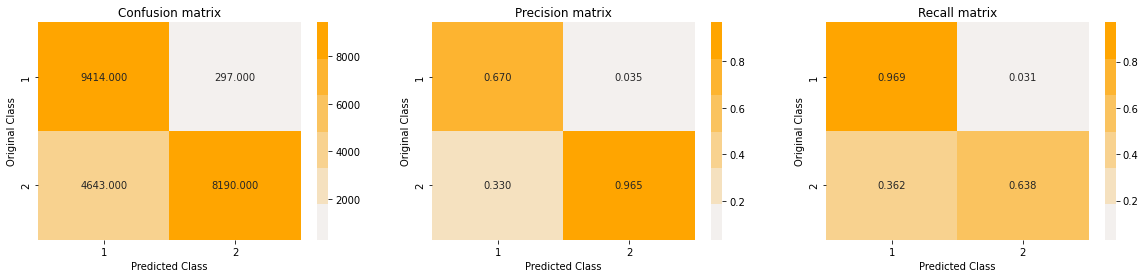

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

**Observation :**

*   1 -> class 0 and 2 -> class 1
*   After deleting some irrelevant elements, the recall and the F1 score both slightly improved, but there was some misunderstanding regarding recall: 64% of the actual points are expected to be in class 2, while 36% are expected to be in class 0.





**4.3 K Nearest Neighbors with Hyperparameter tuning**

For values of alpha =  5 The auc score is: 0.8196686708270643
For values of alpha =  11 The auc score is: 0.8301464293456888
For values of alpha =  15 The auc score is: 0.8378081555793572
For values of alpha =  21 The auc score is: 0.8460657712961873
For values of alpha =  31 The auc score is: 0.8525052502477044
For values of alpha =  41 The auc score is: 0.8609643765205622
For values of alpha =  51 The auc score is: 0.8663269284953403
For values of alpha =  99 The auc score is: 0.879754580885607


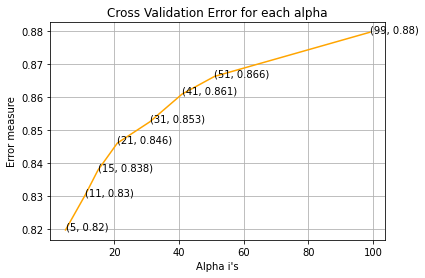

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

alpha = [5, 11, 15, 21, 31, 41, 51, 99]

auc = []
for i in alpha:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    predict_y = clf.predict_proba(X_test)[:,1]
    auc.append(roc_auc_score(y_test, predict_y))
    print('For values of alpha = ', i, "The auc score is:",roc_auc_score(y_test, predict_y))

fig, ax = plt.subplots()
ax.plot(alpha, auc,c='orange')
for i, txt in enumerate(np.round(auc,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],auc[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors =99)
clf.fit(X_train, y_train)
predict_y_train = clf.predict_proba(X_train)[:,1]
print('For values of best alpha = ', 99, "The train auc score is:",roc_auc_score(y_train, predict_y_train))
predict_y_test = clf.predict_proba(X_test)[:,1]
print('For values of best alpha = ', 99, "The test auc score is:",roc_auc_score(y_test, predict_y_test))

For values of best alpha =  99 The train auc score is: 0.9997457375599961
For values of best alpha =  99 The test auc score is: 0.879754580885607


In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9909081587312438
Test f1 score 0.8033723143867282
****************************************************************************************************
train recall score / detection rate 0.9889476377281256
test recall score / detection rate 0.6905633912569158


Train confusion_matrix


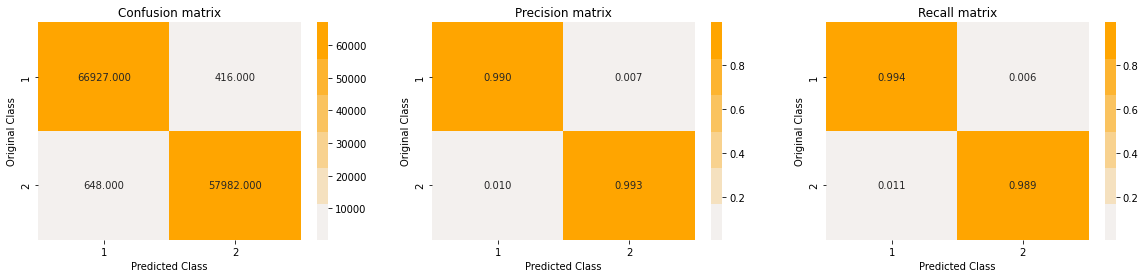

Test confusion_matrix


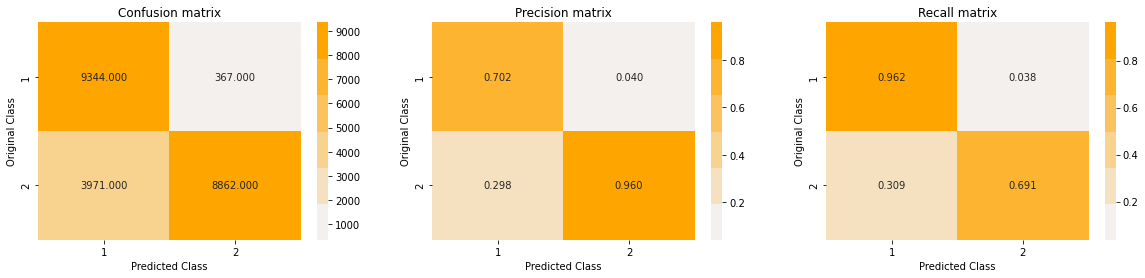

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

**Observation :**


*   1 -> class 0 and 2 -> class 1
*   There is some confusion on test data between class 2 and class 1 in the recall even though the simple knn model is providing us greater auc, f1, and recall value.
This can be a result of the disparity in class.






**4.4 Decision tree with hyperparameter tuning**

In [ ]:
# Initializatioin of hyperparam and lets take only two hyperparam to tune
from scipy.stats import randint as sp_randint
parameters =  parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'min_samples_split':[5, 10,50,100, 500]}
# using grid search lets find out the best hyperparam value
# Decision tree using gini impurity 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
DT = GridSearchCV(DTC(criterion= 'gini'), parameters, cv=3 ,scoring='roc_auc')
DT.fit(X_train,y_train)

#print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 50, 100, 500]},
             scoring='roc_auc')

In [ ]:
print('mean test scores',DT.cv_results_['mean_test_score'])
#print('mean train scores',DT.cv_results_['mean_train_score'])

mean test scores [0.92156999 0.92156999 0.92156999 0.92156999 0.92156999 0.99519219
 0.99519219 0.99519219 0.99519219 0.99515551 0.99752724 0.99760378
 0.99771351 0.99783121 0.99794897 0.99863863 0.99864183 0.99909599
 0.99920353 0.99931778 0.99850243 0.9987823  0.99908069 0.99919711
 0.99929906 0.99850443 0.99871432 0.9990797  0.99921237 0.99931634
 0.99856401 0.9987333  0.99915895 0.99919699 0.99930722]


In [ ]:
print(DT.best_estimator_)

DecisionTreeClassifier(max_depth=50, min_samples_split=500)


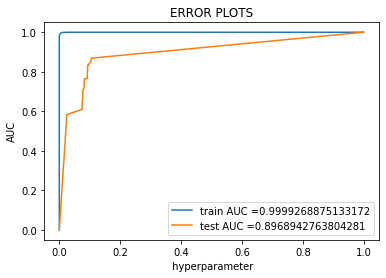

In [ ]:
from sklearn.metrics import roc_curve, auc

DT.fit(X_train , y_train)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value       
train_fpr, train_tpr, thresholds = roc_curve(y_train, DT.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9950180850337813
Test f1 score 0.8085683060109289


In [ ]:
print('Train recall score or detection rate',recall_score(y_train,y_train_pred))
print('Train recall score or detection rate',recall_score(y_test,y_test_pred))

Train recall score or detection rate 0.994712604468702
Train recall score or detection rate 0.7206420945998597


Train confusion_matrix


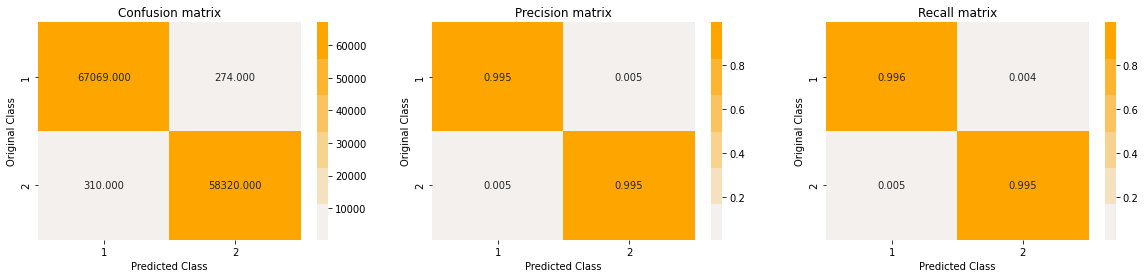

Test confusion_matrix


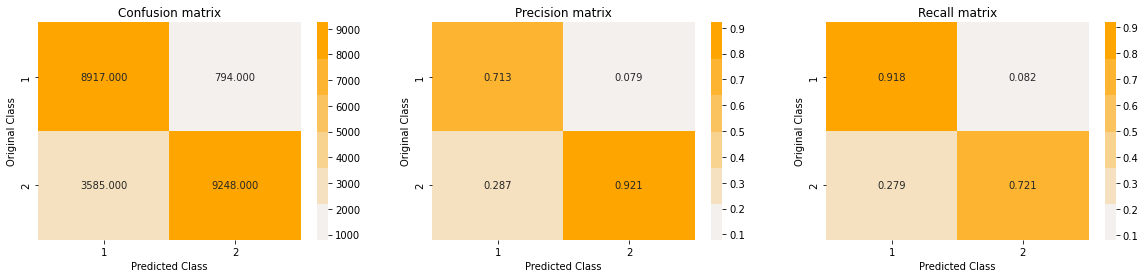

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

**Observation :**

*  1 -> class 0 and 2 -> class 1
*   This is now the finest model we have; after performing some class balance, we obtained a respectable AUC, F1 score, and recall. In addition, the model is no longer confused 






**4.5 Random Forest Hyperparameter tuning**

In [ ]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='roc_auc',random_state=25)

rf_random.fit(X_train,y_train)
#print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2eafab90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2cdf9b10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2ce4d6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2ce4d890>},
                   random_state=25, scoring='roc_auc')

In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


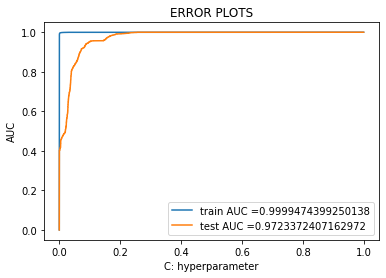

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight={0:1,1:20}, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
clf.fit(X_train , y_train)
     
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9842349719891483
Test f1 score 0.872905563845662
****************************************************************************************************
train recall score / detection rate 0.9993518676445505
test recall score / detection rate 0.7977090314034131


Train confusion_matrix


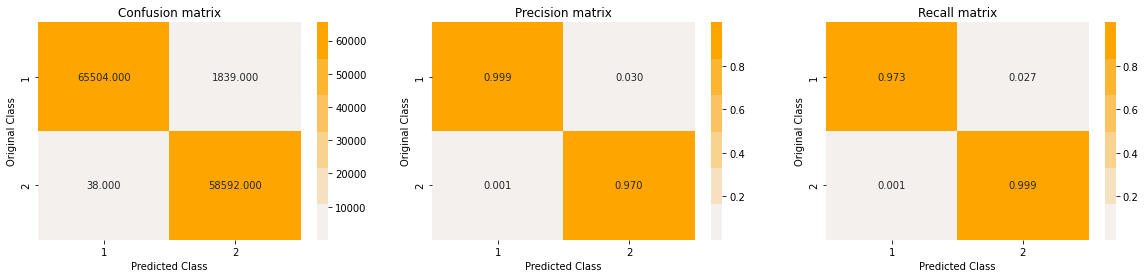

Test confusion_matrix


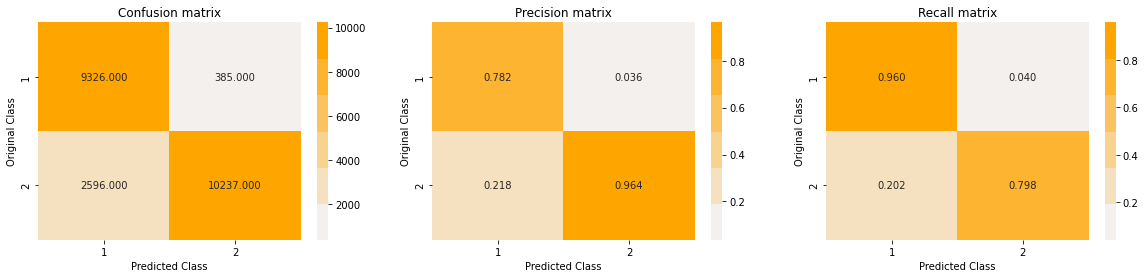

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

**Observation :**

*   1 -> class 0 and 2 -> class 1
*   this model is better from other model in term of AUC , it has also good f1 and recall value but less than Decision tree.







**4.6 XGBOOST with Hyperparameter tuning**

In [ ]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)

xgboost = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='roc_auc',random_state=25)

xgboost.fit(X_train,y_train)
#print('mean test scores',xgboost.cv_results_['mean_test_score'])
#print('mean train scores',xgboost.cv_results_['mean_train_score'])

RandomizedSearchCV(cv=10, estimator=XGBClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2cdd1690>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2c5af410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2cdd1190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2a2c5aa6d0>},
                   random_state=25, scoring='roc_auc')

In [ ]:
print(xgboost.best_estimator_)

XGBClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
              n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, min_samples_leaf=33,
       min_samples_split=138, missing=None, n_estimators=109, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=25,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

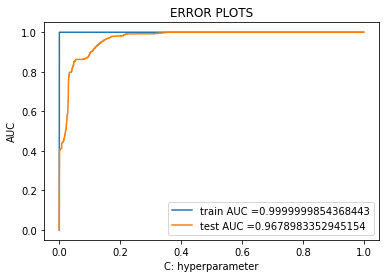

In [ ]:
from sklearn.metrics import roc_curve, auc

clf.fit(X_train , y_train)
     
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9999061921696045
Test f1 score 0.75875781102064


In [ ]:
print('Train Detecction rate/recall',recall_score(y_train,y_train_pred))
print('Test Detecction rate/recall',recall_score(y_test,y_test_pred))

Train Detecction rate/recall 0.9999147194269146
Test Detecction rate/recall 0.6244837528247487


Train confusion_matrix


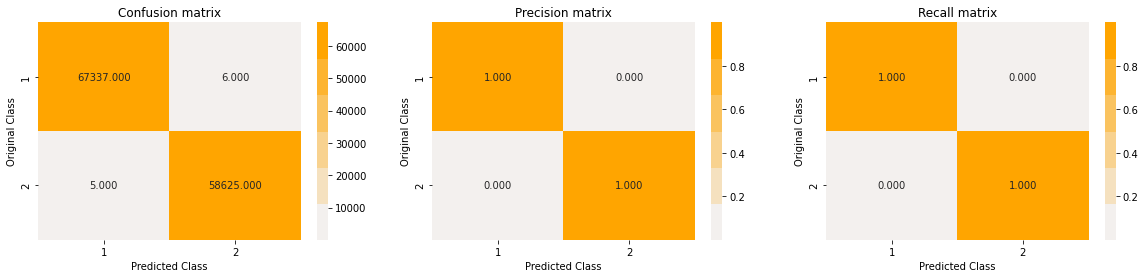

Test confusion_matrix


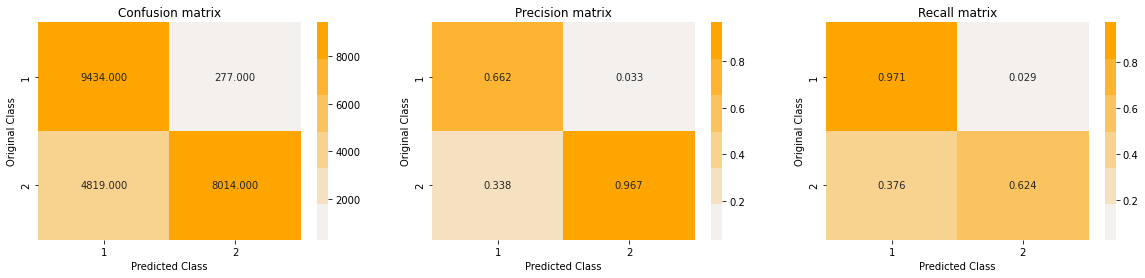

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

**Observation :**
*   1 -> class 0 and 2 -> class 1
*   The xgboost model is not performed as expected
*   It cant recall well on the test data



#**5. Comparision between the machine learning algorithms**

In [ ]:
from prettytable import PrettyTable
k = PrettyTable()
p = PrettyTable()
print('*************Before feature selection**************')
k.field_names = ["Model","Train AUC" ,"Test AUC" ,"f1 score on test data" , "recall on test data"]
k.add_row(["Naive Bayes" , .9829 , 0.8400,0.7687,.6388])
print(k)
print('*********After feature selection**************')
p.field_names = ["Model","Train AUC" ,"Test AUC" ,"f1 score on test data" , "recall on test data"]
p.add_row(["Naive Bayes" , .9863 , 0.8553,0.7734,.6452])
p.add_row(["KNN" , .999 , 0.891,0.7806,.6593])
p.add_row(["Logistic Regression" , .9928 , 0.9049,0.7264,.6032])
p.add_row(["Decision Tree" , .9998 , 0.9011,0.8820,.8549])
p.add_row(["Random Forest" , .9999 , 0.9684,0.8754,.8030])
p.add_row(["Xgboost" , .9999 , 0.9672,0.7592,.6253])
print(p)

*************Before feature selection**************
+-------------+-----------+----------+-----------------------+---------------------+
|    Model    | Train AUC | Test AUC | f1 score on test data | recall on test data |
+-------------+-----------+----------+-----------------------+---------------------+
| Naive Bayes |   0.9829  |   0.84   |         0.7687        |        0.6388       |
+-------------+-----------+----------+-----------------------+---------------------+
*********After feature selection**************
+---------------------+-----------+----------+-----------------------+---------------------+
|        Model        | Train AUC | Test AUC | f1 score on test data | recall on test data |
+---------------------+-----------+----------+-----------------------+---------------------+
|     Naive Bayes     |   0.9863  |  0.8553  |         0.7734        |        0.6452       |
|         KNN         |   0.999   |  0.891   |         0.7806        |        0.6593       |
| Logistic 